In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("dropout_data.csv")  # Replace with your file name if different

# Display the first few rows
print("🔹 Preview of the dataset:")
display(df.head())

# Display dataset shape
print(f"\n🔹 Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Show column names and data types
print("\n🔹 Column data types:")
print(df.dtypes)


🔹 Preview of the dataset:


,Province,District,Sector,School_Name,Year,Male_Dropout_Percentage,Female_Dropout_Percentage,Overall_Dropout_Percentage,Completion_Male,Completion_Female,Completion_Total,Reenrollment_Rate,Attendance_Rate,Avg_Household_Income_RWF,Teacher_Student_Ratio,Latitude,Longitude
0,Kigali,Gasabo,Kinyinya,GS Mweya,2010,23.61,18.31,20.96,72.29,55.00,63.65,2.86,78.37,488468,1:40,-2.12583,30.90143
1,Kigali,Gasabo,Gisozi,GS Buye,2011,19.88,2.64,11.26,86.10,96.93,91.51,12.35,60.03,203355,1:40,-2.12583,30.90143
2,Kigali,Gasabo,Gatsata,ES Kigoma,2012,18.74,1.20,9.97,51.15,76.24,63.70,7.65,75.99,249503,1:40,-2.12583,30.90143
3,Kigali,Gasabo,Gatsata,GS Gitega,2013,29.51,14.54,22.02,93.00,84.02,88.51,18.84,78.02,449457,1:40,-2.12583,30.90143
4,Kigali,Gasabo,Kimironko,GS Kinteko,2014,17.34,12.18,14.76,50.80,61.54,56.17,12.20,69.64,254555,1:40,-2.12583,30.90143



🔹 Dataset shape: 2025 rows and 17 columns

🔹 Column data types:
Province                       object
District                       object
Sector                         object
School_Name                    object
Year                            int64
Male_Dropout_Percentage       float64
Female_Dropout_Percentage     float64
Overall_Dropout_Percentage    float64
Completion_Male               float64
Completion_Female             float64
Completion_Total              float64
Reenrollment_Rate             float64
Attendance_Rate               float64
Avg_Household_Income_RWF        int64
Teacher_Student_Ratio          object
Latitude                      float64
Longitude                     float64
dtype: object


In [3]:
print("🔹 Column names in the dataset:")
print(df.columns.tolist())


🔹 Column names in the dataset:
['Province', 'District', 'Sector', 'School_Name', 'Year', 'Male_Dropout_Percentage', 'Female_Dropout_Percentage', 'Overall_Dropout_Percentage', 'Completion_Male', 'Completion_Female', 'Completion_Total', 'Reenrollment_Rate', 'Attendance_Rate', 'Avg_Household_Income_RWF', 'Teacher_Student_Ratio', 'Latitude', 'Longitude', 'TS_Ratio_Numeric']


In [5]:
# Convert 'teacher_student_ratio' like "1:30" to numeric value 30.0
def convert_ratio(ratio_str):
    try:
        parts = ratio_str.split(":")
        return round(float(parts[1]) / float(parts[0]), 2)
    except:
        return None

# Apply conversion if column exists
if 'teacher_student_ratio' in df.columns:
    df['ts_ratio_numeric'] = df['teacher_student_ratio'].apply(convert_ratio)

# Drop rows where critical fields are missing (year and dropout)
df = df.dropna(subset=['overall_dropout_percentage', 'year'])

# Fill remaining missing values with 0
df.fillna(0, inplace=True)

# Show preview
df.head()


,province,district,sector,school_name,year,male_dropout_percentage,female_dropout_percentage,overall_dropout_percentage,completion_male,completion_female,completion_total,reenrollment_rate,attendance_rate,avg_household_income_rwf,teacher_student_ratio,latitude,longitude,ts_ratio_numeric
0,Kigali,Gasabo,Kinyinya,GS Mweya,2010,23.61,18.31,20.96,72.29,55.00,63.65,2.86,78.37,488468,1:40,-2.12583,30.90143,40.0
1,Kigali,Gasabo,Gisozi,GS Buye,2011,19.88,2.64,11.26,86.10,96.93,91.51,12.35,60.03,203355,1:40,-2.12583,30.90143,40.0
2,Kigali,Gasabo,Gatsata,ES Kigoma,2012,18.74,1.20,9.97,51.15,76.24,63.70,7.65,75.99,249503,1:40,-2.12583,30.90143,40.0
3,Kigali,Gasabo,Gatsata,GS Gitega,2013,29.51,14.54,22.02,93.00,84.02,88.51,18.84,78.02,449457,1:40,-2.12583,30.90143,40.0
4,Kigali,Gasabo,Kimironko,GS Kinteko,2014,17.34,12.18,14.76,50.80,61.54,56.17,12.20,69.64,254555,1:40,-2.12583,30.90143,40.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [7]:
# Summary stats for numerical columns
df.describe()


,year,male_dropout_percentage,female_dropout_percentage,overall_dropout_percentage,completion_male,completion_female,completion_total,reenrollment_rate,attendance_rate,avg_household_income_rwf,latitude,longitude,ts_ratio_numeric
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,2017.000000,15.276953,15.415284,15.346025,74.602548,75.176746,74.889679,9.986054,79.877047,350583.099259,-1.901438,29.980145,44.007407
std,4.321561,8.388400,8.311990,6.003110,14.592175,14.388371,10.186800,5.754265,11.460012,144671.894266,0.506171,0.587862,8.853632
min,2010.000000,1.000000,1.030000,1.310000,50.060000,50.010000,50.530000,0.000000,60.030000,100005.000000,-2.793120,29.022710,30.000000
25%,2013.000000,8.090000,8.440000,10.830000,62.010000,62.800000,67.930000,5.090000,70.180000,226150.000000,-2.329080,29.493650,36.000000
50%,2017.000000,15.350000,15.340000,15.200000,73.910000,74.910000,74.340000,9.980000,80.110000,346356.000000,-1.942590,29.984330,44.000000
75%,2021.000000,22.580000,22.490000,19.710000,87.410000,87.820000,82.190000,14.830000,89.620000,474999.000000,-1.441310,30.533400,52.000000
max,2024.000000,29.980000,29.990000,29.920000,99.930000,99.990000,98.780000,19.990000,99.990000,599964.000000,-1.021610,30.986770,59.000000


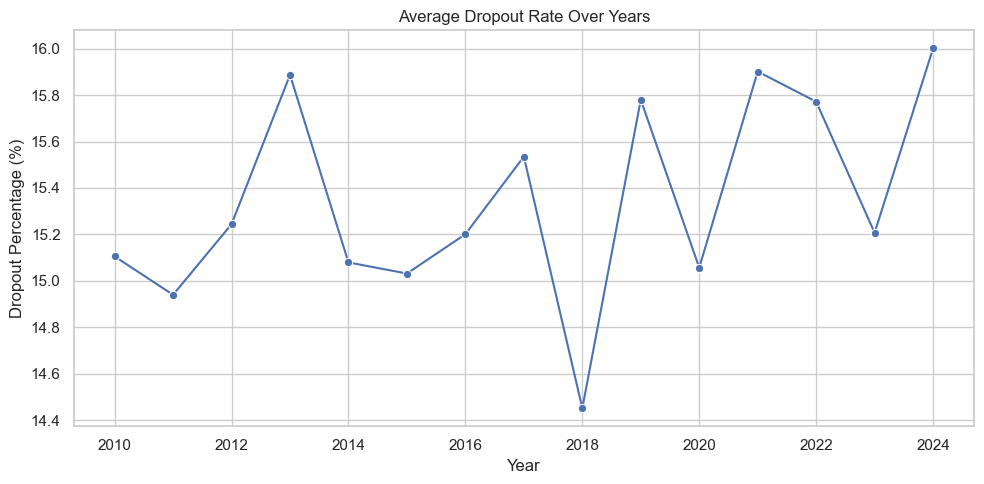

In [8]:
# Average dropout over time
df_yearly = df.groupby('year')['overall_dropout_percentage'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, x='year', y='overall_dropout_percentage', marker='o')
plt.title("Average Dropout Rate Over Years")
plt.ylabel("Dropout Percentage (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Use fill=True instead of deprecated shade=True
sns.kdeplot(df['male_dropout_percentage'], label='Male', fill=True)
sns.kdeplot(df['female_dropout_percentage'], label='Female', fill=True)

plt.title("Distribution of Dropout Rate by Gender")
plt.xlabel("Dropout Percentage (%)")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

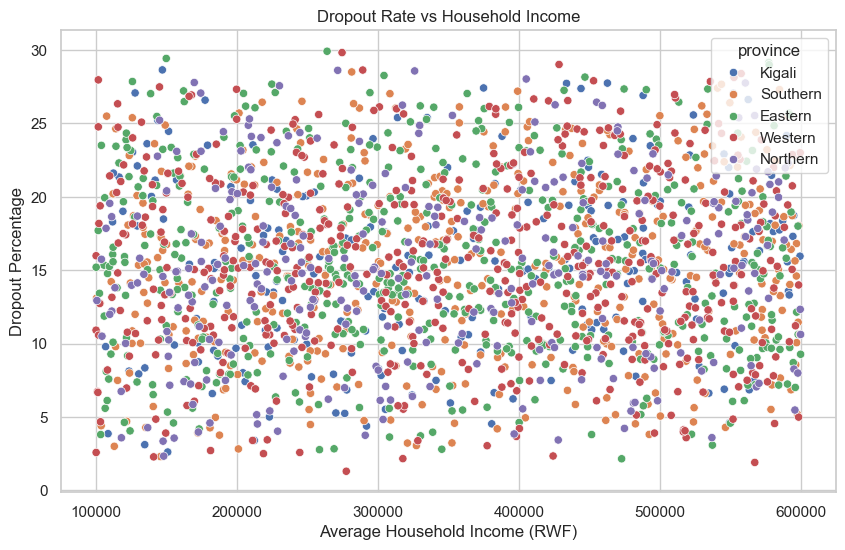

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_household_income_rwf', y='overall_dropout_percentage', hue='province')
plt.title("Dropout Rate vs Household Income")
plt.xlabel("Average Household Income (RWF)")
plt.ylabel("Dropout Percentage")
plt.show()


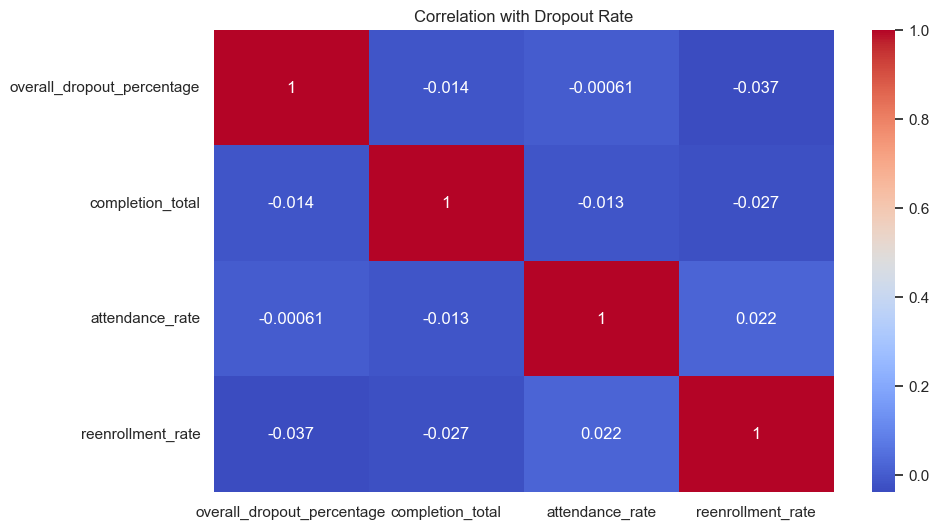

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['overall_dropout_percentage', 'completion_total', 'attendance_rate', 'reenrollment_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Dropout Rate")
plt.show()


In [13]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 195.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 215.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 393.8 kB/s eta 0:00:23
   ---------------------------------------- 0.1/8.9 MB 550.5 kB/s eta 0:00:17
   -------------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create binary label: High (1) if above median, else Low (0)
threshold = df['overall_dropout_percentage'].median()
df['dropout_level'] = (df['overall_dropout_percentage'] > threshold).astype(int)

# Features to use
features = [
    'completion_total',
    'reenrollment_rate',
    'attendance_rate',
    'avg_household_income_rwf',
    'ts_ratio_numeric'
]

# Drop rows with missing/invalid feature values
df_model = df[features + ['dropout_level']].dropna()

X = df_model[features]
y = df_model['dropout_level']


In [16]:
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       210
           1       0.50      0.50      0.50       195

    accuracy                           0.52       405
   macro avg       0.52      0.52      0.52       405
weighted avg       0.52      0.52      0.52       405

🔹 Confusion Matrix:
[[113  97]
 [ 98  97]]


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dropout_data.csv")  # Replace with your file name if different

# Display the first few rows
print("🔹 Preview of the dataset:")
display(df.head())

# Display dataset shape
print(f"\n🔹 Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Show column names and data types
print("\n🔹 Column data types:")
print(df.dtypes)


🔹 Preview of the dataset:


,Province,District,Sector,School_Name,Year,Male_Dropout_Percentage,Female_Dropout_Percentage,Overall_Dropout_Percentage,Completion_Male,Completion_Female,Completion_Total,Reenrollment_Rate,Attendance_Rate,Avg_Household_Income_RWF,Teacher_Student_Ratio,Latitude,Longitude
0,Kigali,Gasabo,Kinyinya,GS Mweya,2010,23.61,18.31,20.96,72.29,55.00,63.65,2.86,78.37,488468,1:40,-2.12583,30.90143
1,Kigali,Gasabo,Gisozi,GS Buye,2011,19.88,2.64,11.26,86.10,96.93,91.51,12.35,60.03,203355,1:40,-2.12583,30.90143
2,Kigali,Gasabo,Gatsata,ES Kigoma,2012,18.74,1.20,9.97,51.15,76.24,63.70,7.65,75.99,249503,1:40,-2.12583,30.90143
3,Kigali,Gasabo,Gatsata,GS Gitega,2013,29.51,14.54,22.02,93.00,84.02,88.51,18.84,78.02,449457,1:40,-2.12583,30.90143
4,Kigali,Gasabo,Kimironko,GS Kinteko,2014,17.34,12.18,14.76,50.80,61.54,56.17,12.20,69.64,254555,1:40,-2.12583,30.90143



🔹 Dataset shape: 2025 rows and 17 columns

🔹 Column data types:
Province                       object
District                       object
Sector                         object
School_Name                    object
Year                            int64
Male_Dropout_Percentage       float64
Female_Dropout_Percentage     float64
Overall_Dropout_Percentage    float64
Completion_Male               float64
Completion_Female             float64
Completion_Total              float64
Reenrollment_Rate             float64
Attendance_Rate               float64
Avg_Household_Income_RWF        int64
Teacher_Student_Ratio          object
Latitude                      float64
Longitude                     float64
dtype: object


In [12]:
print(df.columns.tolist())


['Province', 'District', 'Sector', 'School_Name', 'Year', 'Male_Dropout_Percentage', 'Female_Dropout_Percentage', 'Overall_Dropout_Percentage', 'Completion_Male', 'Completion_Female', 'Completion_Total', 'Reenrollment_Rate', 'Attendance_Rate', 'Avg_Household_Income_RWF', 'Teacher_Student_Ratio', 'Latitude', 'Longitude']


In [13]:
features = [
    'completion_total',
    'reenrollment_rate',
    'attendance_rate',
    'avg_household_income_rwf',
    'ts_ratio_numeric'
]


In [14]:
features = [
    'Completion Total',
    'Re-enrollment Rate',
    'Attendance Rate (%)',
    'Average Household Income (RWF)',
    'TS Ratio Numeric'
]


In [16]:
print(df.columns.tolist())


['Province', 'District', 'Sector', 'School_Name', 'Year', 'Male_Dropout_Percentage', 'Female_Dropout_Percentage', 'Overall_Dropout_Percentage', 'Completion_Male', 'Completion_Female', 'Completion_Total', 'Reenrollment_Rate', 'Attendance_Rate', 'Avg_Household_Income_RWF', 'Teacher_Student_Ratio', 'Latitude', 'Longitude']


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your feature columns (based on your dataset)
features = [
    'Completion_Total',
    'Reenrollment_Rate',
    'Attendance_Rate',
    'Avg_Household_Income_RWF'
]

# Optional: Convert Teacher_Student_Ratio to numeric
def convert_ratio(ratio):
    try:
        return float(ratio.split(':')[0]) / float(ratio.split(':')[1])
    except:
        return np.nan

df['TS_Ratio_Numeric'] = df['Teacher_Student_Ratio'].apply(convert_ratio)
features.append('TS_Ratio_Numeric')

# Target variable: we’ll classify schools into High/Medium/Low dropout levels based on Overall_Dropout_Percentage
def categorize_dropout(val):
    if val >= 25:
        return 'High'
    elif val >= 10:
        return 'Medium'
    else:
        return 'Low'

df['Dropout_Level'] = df['Overall_Dropout_Percentage'].apply(categorize_dropout)

# Build model dataset
df_model = df[features + ['Dropout_Level']].dropna()

X = df_model[features]
y = df_model['Dropout_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        23
         Low       0.38      0.03      0.06        92
      Medium       0.72      0.99      0.84       290

    accuracy                           0.72       405
   macro avg       0.37      0.34      0.30       405
weighted avg       0.60      0.72      0.61       405

[[  0   2  21]
 [  0   3  89]
 [  0   3 287]]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificatio

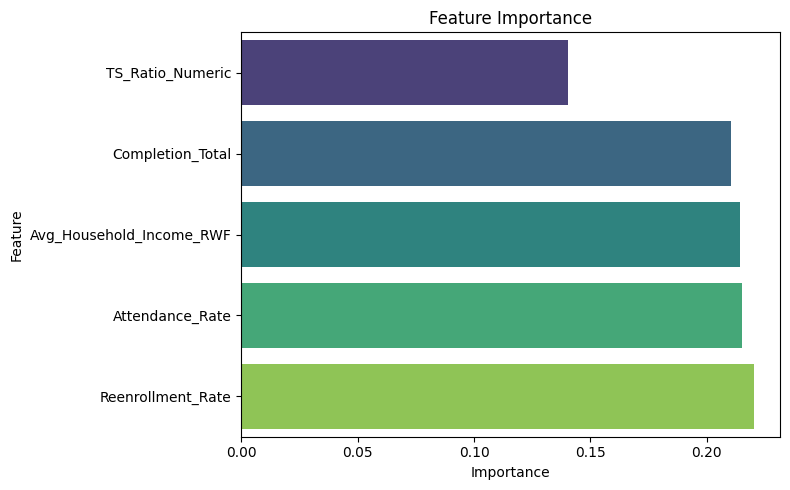

In [18]:
# Feature Importance
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
sorted_features = [features[i] for i in sorted_idx]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[sorted_idx], y=sorted_features, palette="viridis", hue=sorted_features, legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [19]:
# Save enhanced dataset with predictions and features for Power BI
df_export = df[['Province', 'District', 'Sector', 'School_Name', 'Year',
                'Male_Dropout_Percentage', 'Female_Dropout_Percentage', 'Overall_Dropout_Percentage',
                'Completion_Total', 'Reenrollment_Rate', 'Attendance_Rate',
                'Avg_Household_Income_RWF', 'TS_Ratio_Numeric', 'Dropout_Level']]

# Export to CSV
df_export.to_csv('processed_dropout_data.csv', index=False)
print("✅ Data exported successfully to 'processed_dropout_data.csv'")


✅ Data exported successfully to 'processed_dropout_data.csv'
